PART 1: loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


test dataset

In [ ]:
!wget -P /content/drive/MyDrive/ https://zenodo.org/records/10821435/files/test_captions.csv?download=1

--2024-07-20 12:21:44--  https://zenodo.org/records/10821435/files/test_captions.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1770906 (1.7M) [text/plain]
Saving to: ‘/content/drive/MyDrive/test_captions.csv?download=1’

test_captions.csv?d 100%[===================>]   1.69M  1.69MB/s    in 1.0s    

2024-07-20 12:21:46 (1.69 MB/s) - ‘/content/drive/MyDrive/test_captions.csv?download=1’ saved [1770906/1770906]



In [ ]:
!wget -P /content/drive/MyDrive/ https://zenodo.org/records/10821435/files/test_images.zip?download=1

--2024-07-18 19:34:28--  https://zenodo.org/records/10821435/files/test_images.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857754777 (818M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/test_images.zip?download=1.1’

test_images.zip?dow 100%[===================>] 818.02M  50.0MB/s    in 16s     

2024-07-18 19:34:44 (52.7 MB/s) - ‘/content/drive/MyDrive/test_images.zip?download=1.1’ saved [857754777/857754777]



train dataset

In [ ]:
!wget -P /content/drive/MyDrive/ https://zenodo.org/records/10821435/files/train_captions.csv?download=1

--2024-07-20 12:21:59--  https://zenodo.org/records/10821435/files/train_captions.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10100161 (9.6M) [text/plain]
Saving to: ‘/content/drive/MyDrive/train_captions.csv?download=1’

train_captions.csv? 100%[===================>]   9.63M  5.68MB/s    in 1.7s    

2024-07-20 12:22:02 (5.68 MB/s) - ‘/content/drive/MyDrive/train_captions.csv?download=1’ saved [10100161/10100161]



In [ ]:
!wget -P /content/drive/MyDrive/ https://zenodo.org/records/10821435/files/train_images.zip?download=1

--2024-07-18 20:21:56--  https://zenodo.org/records/10821435/files/train_images.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4611440786 (4.3G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/train_images.zip?download=1’

train_images.zip?do 100%[===================>]   4.29G  41.1MB/s    in 1m 54s  

2024-07-18 20:23:50 (38.5 MB/s) - ‘/content/drive/MyDrive/train_images.zip?download=1’ saved [4611440786/4611440786]



In [ ]:
import zipfile
import os
zip_file_path = '/content/drive/MyDrive/test_images.zip?download=1'
zip_file_path2 = '/content/drive/MyDrive/train_images.zip?download=1'
extract_dir = '/content/drive/MyDrive/test_dataset'
extract_dir2 = '/content/drive/MyDrive/train_dataset'

# Create the extraction directory if it doesn't exist
#os.makedirs(extract_dir, exist_ok=True)
os.makedirs(extract_dir2, exist_ok=True)
# Extract the zip file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
 #   zip_ref.extractall(extract_dir)
with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_dir2)

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

PART 2: reconstructing 5 images from the dataset

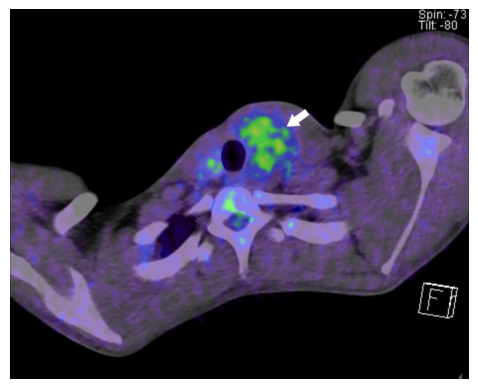

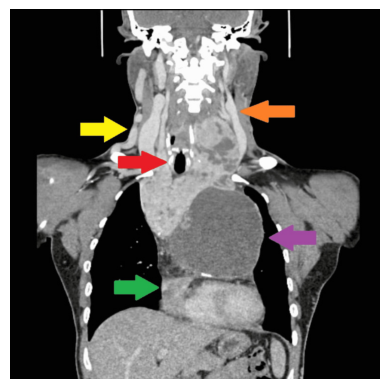

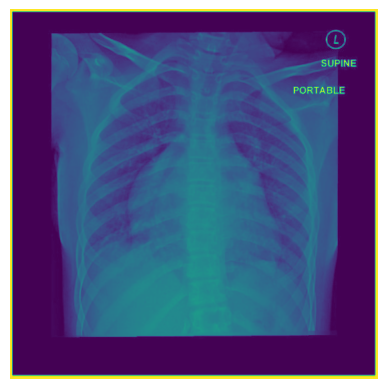

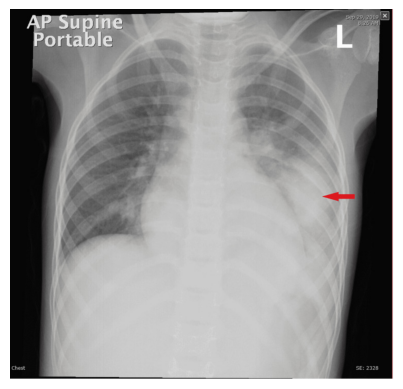

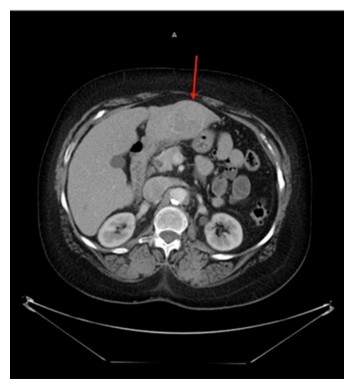

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from transformers import ViTFeatureExtractor
import requests
from PIL import Image
import zipfile
import os

dataset_dir = '/content/drive/MyDrive/test_dataset/test'

# List all files in the dataset directory
all_files = os.listdir(dataset_dir)

# Randomly select 5 image files
selected_files = random.sample(all_files, 5)

# Display the selected images
for image_file in selected_files:
    img_path = os.path.join(dataset_dir, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
pixel_values = feature_extractor(img, return_tensors="pt").pixel_values

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

def show_image(img, title=''):
    # image is [H, W, 3]
    assert img.shape[2] == 3
    plt.imshow(torch.clip((img * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def visualize(pixel_values, model):
    # forward pass
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', pixel_values)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()


config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/448M [00:00<?, ?B/s]

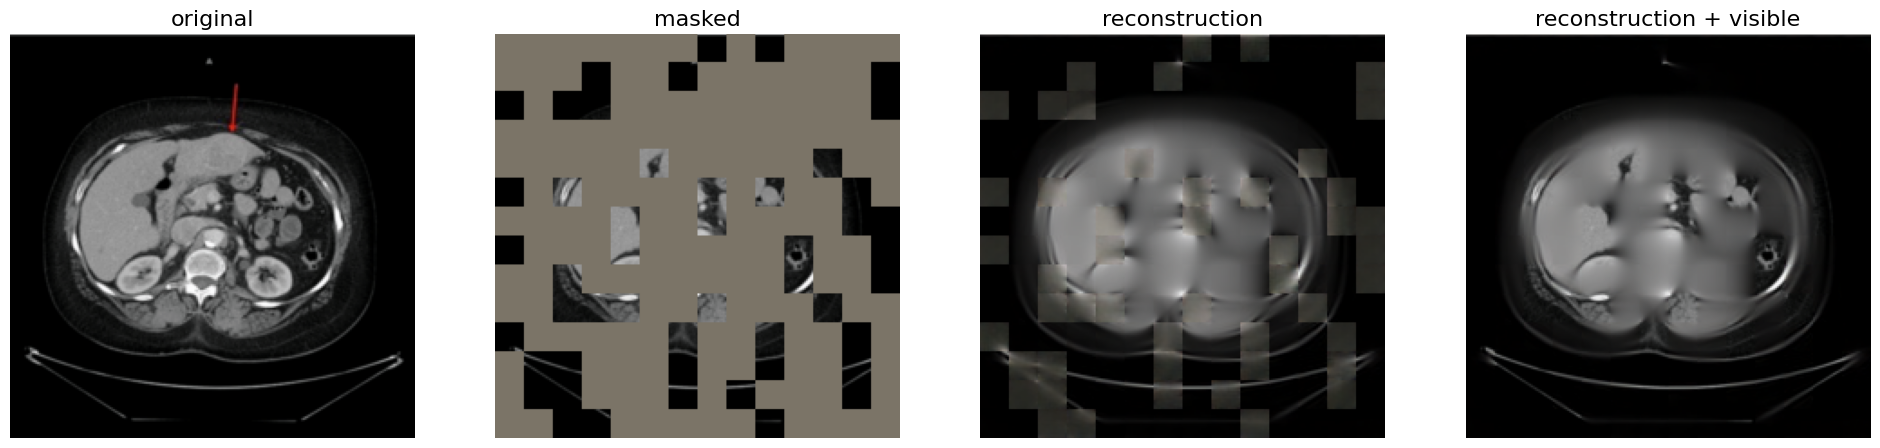

In [ ]:
from transformers import ViTMAEForPreTraining

torch.manual_seed(2)

model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

visualize(pixel_values, model)


PART 3: finetuning

In [ ]:
import zipfile
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from transformers import ViTFeatureExtractor, ViTMAEForPreTraining, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
import numpy as np

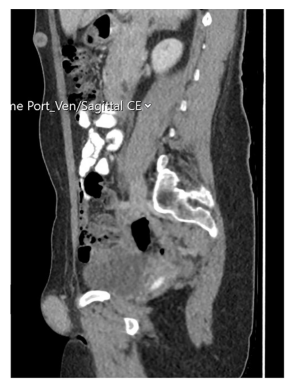

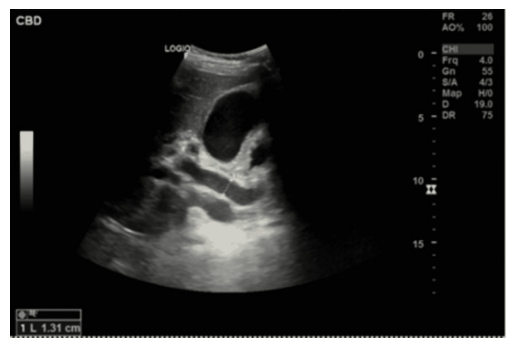

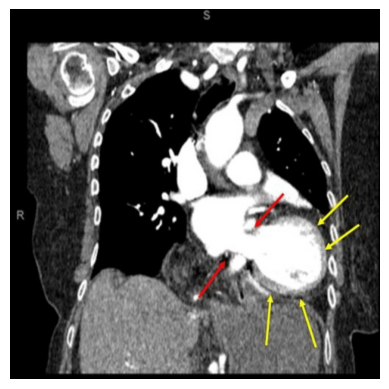

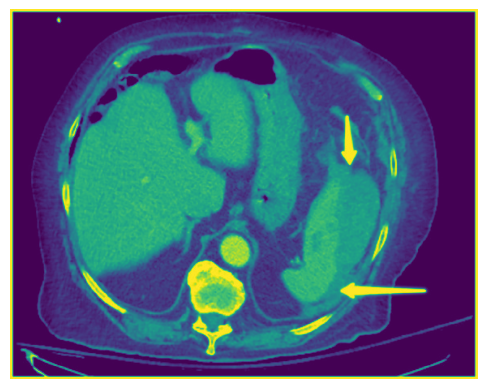

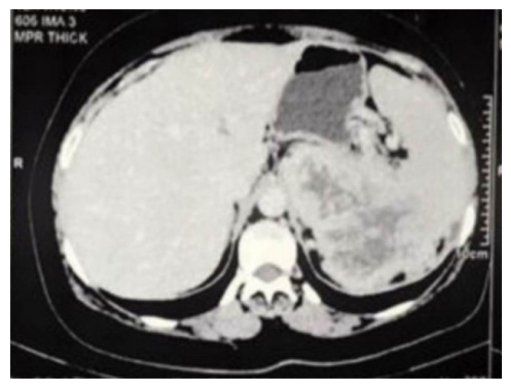

In [ ]:
dataset_dir = '/content/drive/MyDrive/test_dataset/test'
all_files = os.listdir(dataset_dir)
selected_files = random.sample(all_files, 5)

for image_file in selected_files:
    img_path = os.path.join(dataset_dir, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
!pip install pandas

In [ ]:
import os
import pandas as pd
from PIL import Image
import csv
from torch.utils.data import Dataset
from transformers import ViTFeatureExtractor, TrainingArguments, Trainer, ViTMAEForPreTraining

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, csv_file, feature_extractor):
        self.image_dir = image_dir
        self.feature_extractor = feature_extractor
        # Read the CSV file
        self.labels_df = pd.read_csv(csv_file)
        # Get a list of all image files in the directory
        self.image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        inputs = self.feature_extractor(images=image, return_tensors="pt")

        # Extract the corresponding label from the CSV
        image_file_name = os.path.basename(img_path)
        # Check if 'image' column exists, if not, assume filename is in index
        if 'label' in self.labels_df.columns:
            if image_file_name in self.labels_df['image'].values:
                label = self.labels_df[self.labels_df['image'] == image_file_name]['label'].values[0]
            else:
                label = self.labels_df.loc[image_file_name, 'label']  # Access label using filename as index
        else:
            label = -1  # Or any other default value indicating a missing label
        return {
            'pixel_values': inputs['pixel_values'].squeeze(),
            'noise': None,  # Add other keys as necessary, using None or default values if not applicable
            'head_mask': None,
            'output_attentions': None,
            'output_hidden_states': None,
            'return_dict': None,
            'interpolate_pos_encoding': None,
            'label_ids': None,
            'labels': torch.tensor(label, dtype=torch.long)  # Return the label along with the pixel values
        }

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, image_dir,  feature_extractor):
        self.image_dir = image_dir
        self.feature_extractor = feature_extractor
        # Get a list of all image files in the directory
        self.image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        inputs = self.feature_extractor(images=image, return_tensors="pt")

        return image

In [ ]:
# Initialize the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/217 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# Download the dataset
!wget -O train_images.zip https://zenodo.org/records/10821435/files/train_images.zip?download=1

# Extract the dataset
!unzip train_images.zip -d train_images

# Verify the extraction
!ls train_images

Streaming output truncated to the last 5000 lines.
  inflating: train_images/train/ROCOv2_2023_train_055141.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055142.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055143.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055144.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055145.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055146.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055147.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055148.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055149.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055150.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055151.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055152.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055153.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055154.jpg  
  inflating: train_images/train/ROCOv2_2023_train_055155.jpg  
  in

In [ ]:
image_dir_train = '/content/train_images/train'
csv_file_train = '/content/drive/MyDrive/train_captions.csv?download=1'
image_dir_test = '/content/drive/MyDrive/test_dataset/test'
csv_file_test = '/content/drive/MyDrive/test_captions.csv?download=1'

In [ ]:
train_dataset = CustomImageDataset(image_dir=image_dir_train, csv_file=csv_file_train, feature_extractor=feature_extractor)
test_dataset = CustomImageDataset(image_dir=image_dir_test, csv_file=csv_file_test, feature_extractor=feature_extractor)

In [ ]:
# Step 4: Define the training arguments and trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/448M [00:00<?, ?B/s]

In [ ]:
print(len(test_dataset))  # Check if the dataset is empty

9928


In [ ]:
print(len(train_dataset))  # Check if the dataset is empty

59958


In [ ]:
# Step 5: Train the model
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
# Step 6: Visualize the results
def show_image(img, title=''):
    assert img.shape[2] == 3
    plt.imshow(torch.clip((img * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def visualize(pixel_values, model):
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 *3)
    mask = model.unpatchify(mask)
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    x = torch.einsum('nchw->nhwc', pixel_values)
    im_masked = x * (1 - mask)
    im_paste = x * (1 - mask) + y * mask
    plt.rcParams['figure.figsize'] = [24, 24]
    plt.subplot(1, 4, 1)
    show_image(x[0], "original")
    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")
    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")
    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")
    plt.show()

# Visualize the results on some test images
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
for pixel_values in test_loader:
    visualize(pixel_values, model)
    break  # Just visualize one batch

